In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
Dataset = pd.read_csv("Social_Network_Ads.csv")

In [19]:
print(Dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [20]:
Dataset.drop(["User ID"],axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
X = Dataset.iloc[:,[2,3]].values
y = Dataset.iloc[:,[4]].values

In [24]:
from sklearn.cluster import KMeans 


In [ ]:
wcss=[]
for i in range(1,len(Dataset)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',  max_iter = 300 , n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

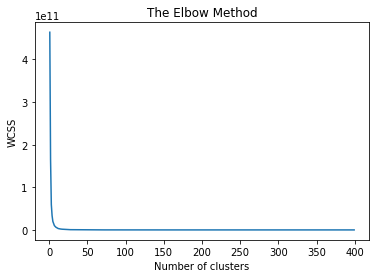

In [10]:
plt.plot(range(1,len(Dataset)),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++',  max_iter = 300 , n_init=10, random_state = 0)
y_means = kmeans.fit_predict(X)

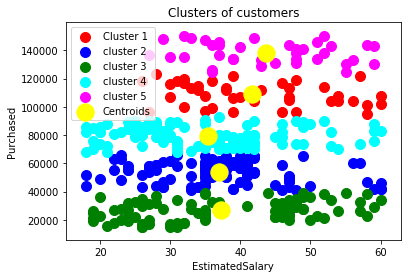

In [28]:
# Visualising the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1],s = 100, c='blue',label='cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2,1],s = 100, c='green',label='cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3,1],s = 100, c='cyan',label='cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4,1],s = 100, c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.legend()
plt.show()